In [1]:
# 必要な物を読み込む
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.path import Path 
import pandas as pd
import matplotlib.patches as patches
import bokeh.plotting as bkh
from pitchpx.const import PitchPxConst


In [2]:
# Pitching data for Hisashi Iwakuma(no-no game)
pitch_20150812 = pd.read_csv('./data/mlbam_pitch_20150812.csv')

In [3]:
iwakuma = pitch_20150812.query('pit_box_name=="Iwakuma"')
iwakuma_r = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_hand_cd=="R"')
iwakuma_l = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_hand_cd=="L"')

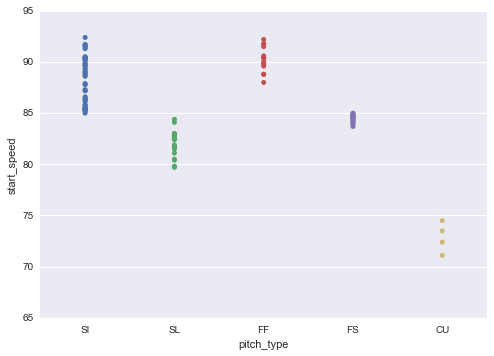

In [4]:
# 球種はこのリンクを参照 http://pitchfx.texasleaguers.com/
"""
FA:Fastball
FF:4-seam Fastball
FT:2-seam Fastball
FC:Cut Fastball
FS:Split-finger Fastball
FO:Forkball
SI:Sinker
SL:Slider
CU:Curveball
KC:Knuckle Curve
EP:Ephuus
CH:Change-up
SC:Screwball
KN:Knuckleball
UN:Unknown
"""

# X:球種 Y:球速で球種ごとの球速の分布をざっくりと可視化
sns.stripplot(x="pitch_type", y="start_speed", data=iwakuma)

In [5]:
# ストライクゾーンを加える

verts = [
    (1.5, -0.8), # left, bottom
    (3.5, -0.8), # left, top
    (3.5, 0.8), # right, top
    (1.5, 0.8), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='black', lw=2)

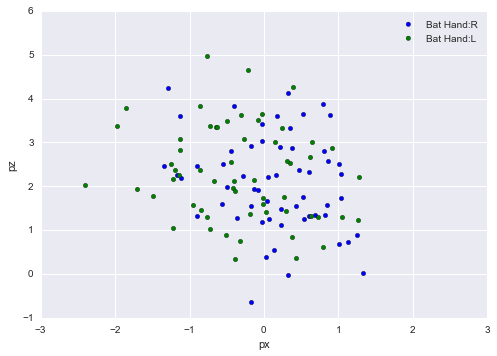

In [6]:
ax = iwakuma_r.plot(kind='scatter', x='px', y='pz', color='Blue', label='Bat Hand:R', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0))
#ax.add_patch(patch)
ax = iwakuma_l.plot(kind='scatter', x='px', y='pz', color='Green', label='Bat Hand:L', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0), ax=ax, )

In [7]:
iwakuma_vs_davis_c = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_box_name=="Davis, C"')

In [8]:
iwakuma_vs_davis_c

,retro_game_id,year,month,day,st_fl,regseason_fl,playoff_fl,game_type,game_type_des,local_game_time,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_confidence,zone,spin_dir,spin_rate,sv_id
735,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,26.6,8.5,SI,SI,0.916,13,259.324,1902.892,150812_130119
736,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.9,-6.0,8.9,SL,SI|SL,0.897,14,114.293,265.343,150812_130135
737,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,15.6,10.0,FS,SI|SL|FS,0.867,13,287.511,1382.565,150812_130200
738,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,-5.0,9.3,SL,SI|SL|FS|SL,0.840,1,52.199,272.429,150812_130216
811,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,30.5,6.6,SI,SI,0.868,12,244.581,2096.624,150812_134610
812,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,-4.8,8.5,SL,SI|SL,0.865,11,123.913,308.777,150812_134646
813,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,-7.2,9.0,SL,SI|SL|SL,0.895,7,86.781,390.504,150812_134713
814,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,28.1,8.3,SI,SI|SL|SL|SI,0.888,6,270.500,2172.351,150812_134742
815,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,17.1,9.6,FS,SI|SL|SL|SI|FS,0.907,13,279.441,1376.826,150812_134813
888,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,21.9,10.5,SI,SI,0.865,13,286.134,2014.963,150812_143804


In [9]:
iwakuma_vs_davis_c_7 = iwakuma_vs_davis_c.query('inning_number==7')

In [10]:
iwakuma_vs_davis_c_7

,retro_game_id,year,month,day,st_fl,regseason_fl,playoff_fl,game_type,game_type_des,local_game_time,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_confidence,zone,spin_dir,spin_rate,sv_id
888,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,21.9,10.5,SI,SI,0.865,13,286.134,2014.963,150812_143804
889,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,32.5,6.5,SI,SI|SI,0.675,6,244.552,2189.401,150812_143823
890,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.6,28.1,5.5,FF,SI|SI|FF,0.941,2,228.616,1952.319,150812_143852
891,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,17.2,11.2,SI,SI|SI|FF|SI,0.779,13,302.253,1836.259,150812_143918
892,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,19.0,9.2,SI,SI|SI|FF|SI|SI,0.902,13,270.500,1518.785,150812_143940


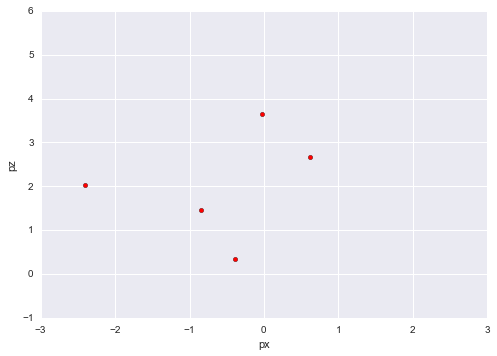

In [11]:
ax = iwakuma_vs_davis_c_7.plot(kind='scatter', x='px', y='pz', color='Red', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0), )

In [12]:
iwakuma.groupby(['inning_number', 'pitch_type']).mean()[['spin_rate', 'start_speed', 'end_speed']]

spin_rate  start_speed  end_speed
inning_number pitch_type                                     
1             FF          1579.343000    89.800000  81.233333
              FS          1672.320000    84.800000  77.300000
              SI          1736.486500    87.950000  80.250000
              SL           477.341667    81.500000  74.933333
2             CU          1711.515000    71.100000  64.600000
              FF          1727.654000    88.800000  79.600000
              FS          1382.565000    84.700000  77.800000
              SI          1811.870333    87.900000  79.933333
              SL           347.481000    82.166667  75.633333
3             CU          1839.371000    72.400000  67.200000
              FF          1641.498000    89.300000  81.200000
              FS          1676.137000    85.000000  77.600000
              SI          1731.736333    87.900000  79.400000
              SL           352.012500    80.100000  73.300000
4             CU          1324.645000    74.500000  68.300000
              FF          1906.083000    91.700000  83.200000
              FS          1579.203500    83.950000  77.100000
              SI          1798.443364    88.418182  80.781818
              SL           587.967143    81.842857  74.885714
5             FF          1546.986000    89.800000  81.400000
              SI          1754.599286    87.614286  79.928571
              SL           235.483500    82.475000  75.925000
6             CU          1391.726000    73.500000  67.800000
              FF          1851.374000    90.766667  82.233333
              FS          1886.700500    84.500000  77.000000
              SI          1684.112143    86.871429  79.657143
              SL           384.106000    83.000000  76.100000
7             FF          2057.949000    91.400000  82.250000
              FS          1840.499667    84.266667  76.933333
              SI          1954.765333    87.966667  80.033333
              SL           560.351000    82.500000  75.300000
8             FF          2020.551000    90.400000  81.600000
              FS          1721.363286    84.528571  77.942857
              SI          1857.559250    88.987500  81.237500
              SL           600.244000    82.900000  76.000000
9             FF          1806.958000    90.000000  82.000000
              SI          2169.026375    89.062500  80.950000

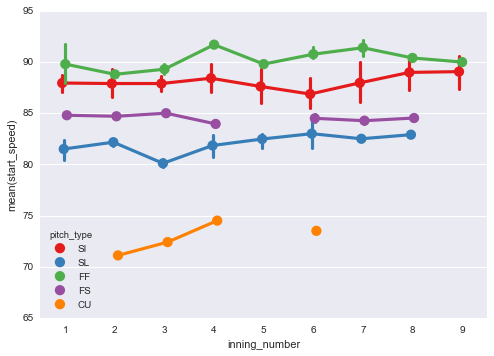

In [13]:
# イニングごとの初速平均
sns.pointplot(x="inning_number", y="start_speed", hue="pitch_type", data=iwakuma, dodge=True, palette="Set1");


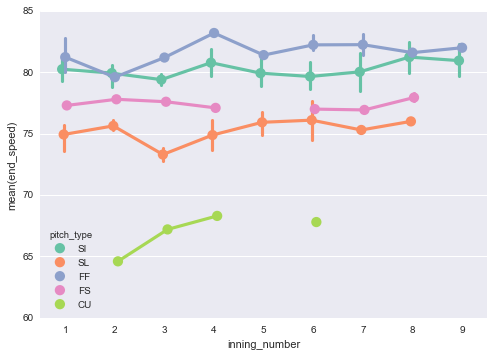

In [14]:
# イニング・球種ごとの終速平均
sns.pointplot(x="inning_number", y="end_speed", hue="pitch_type", data=iwakuma, dodge=True, palette="Set2");


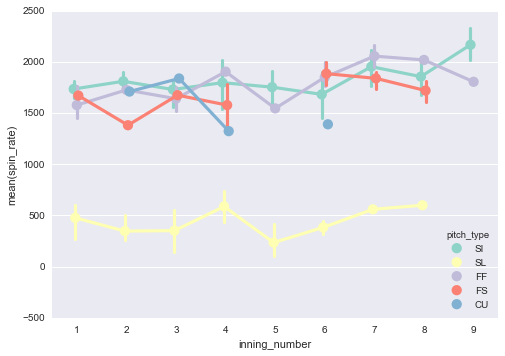

In [15]:
# イニング・球種ごとの回転数(Spin Rate)平均
sns.pointplot(x="inning_number", y="spin_rate", hue="pitch_type", data=iwakuma, dodge=True, palette="Set3");

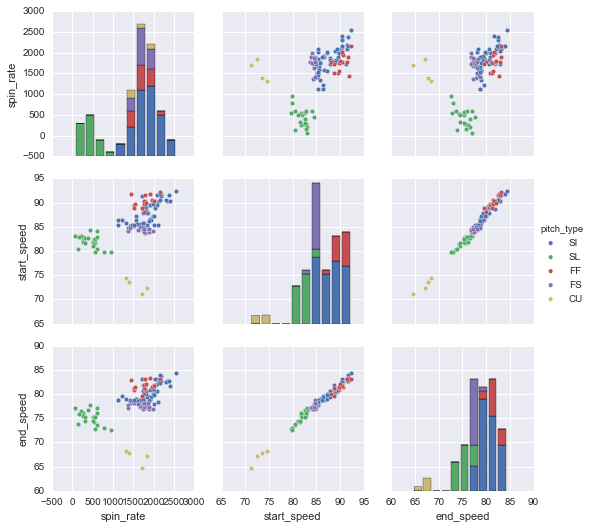

In [16]:
sns.pairplot(iwakuma[['spin_rate', 'start_speed', 'end_speed', 'pitch_type']], hue="pitch_type")


In [17]:
iwakuma_g = iwakuma.groupby(['inning_number', 'pitch_type'])

In [18]:
iwakuma_g.count()[['spin_rate', 'start_speed', 'end_speed']]

spin_rate  start_speed  end_speed
inning_number pitch_type                                   
1             FF                  3            3          3
              FS                  1            1          1
              SI                  4            4          4
              SL                  3            3          3
2             CU                  1            1          1
              FF                  1            1          1
              FS                  1            1          1
              SI                  3            3          3
              SL                  3            3          3
3             CU                  1            1          1
              FF                  2            2          2
              FS                  1            1          1
              SI                  3            3          3
              SL                  2            2          2
4             CU                  1            1          1
              FF                  1            1          1
              FS                  2            2          2
              SI                 11           11         11
              SL                  7            7          7
5             FF                  1            1          1
              SI                  7            7          7
              SL                  4            4          4
6             CU                  1            1          1
              FF                  3            3          3
              FS                  2            2          2
              SI                  7            7          7
              SL                  2            2          2
7             FF                  2            2          2
              FS                  3            3          3
              SI                  6            6          6
              SL                  1            1          1
8             FF                  1            1          1
              FS                  7            7          7
              SI                  8            8          8
              SL                  1            1          1
9             FF                  1            1          1
              SI                  8            8          8